### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import lightgbm as lgb
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold, RepeatedKFold, train_test_split, GridSearchCV

In [2]:
hist_trans = pd.read_csv('C:\\Kaggle competetion datasets\\Elo Merchent Category Recommendation\\Elo Models\\historical_transactions.csv')
hist_trans.shape

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(221526, 118)

In [3]:
hist_trans.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,mv0-1,mv1-2,mv2-3,mv3-4,...,purchase_coef,purchase_intercept,subsector_id_coef_count,subsector_id_coef_inter,subsector_id_coef_new,subsector_id_intercept_count,subsector_id_intercept_inter,subsector_id_intercept_new,trans_count_coef,trans_count_intercept
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,81.0,19.0,7.0,1.0,...,-23.809091,-5.690909,9.245455,3.854545,1.830303,-13.200000,-0.200000,4.533333,28.109091,-2.109091
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,98.0,28.0,9.0,1.0,...,-22.246429,28.571429,9.867857,3.690110,0.703297,-2.676190,4.395604,8.868132,26.171429,-21.371429
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,11.0,1.0,1.0,NaN,...,-2.264706,-11.750000,1.038235,0.525000,0.203571,4.925000,-0.933333,0.171429,2.335294,11.400000
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,46.0,11.0,NaN,NaN,...,-8.154762,-15.178571,5.190476,2.642857,0.964286,0.142857,2.142857,4.285714,9.357143,15.142857
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,83.0,14.0,1.0,1.0,...,-18.914286,-9.133333,7.600000,3.700000,1.800000,-0.266667,0.900000,2.600000,30.457143,-2.933333


In [4]:
hist_trans.dtypes

first_active_month                       object
card_id                                  object
feature_1                                 int64
feature_2                                 int64
feature_3                                 int64
target                                  float64
mv0-1                                   float64
mv1-2                                   float64
mv2-3                                   float64
mv3-4                                   float64
mv4above                                float64
tr0-02                                  float64
tr02-05                                 float64
tr05-1                                  float64
tr1-3                                   float64
tr3andabove                             float64
trp0-02                                 float64
trp02-05                                float64
trp05-1                                 float64
trp1-3                                  float64
trp3andabove                            

In [5]:
len(hist_trans.card_id.unique())

201917

### Select all the columns except "first_active_month"

In [6]:
hist_trans1 = pd.DataFrame(hist_trans.loc[:, hist_trans.columns!='first_active_month'])
print(hist_trans1.shape)
print(hist_trans1.columns)

(221526, 117)
Index(['card_id', 'feature_1', 'feature_2', 'feature_3', 'target', 'mv0-1',
       'mv1-2', 'mv2-3', 'mv3-4', 'mv4above',
       ...
       'purchase_coef', 'purchase_intercept', 'subsector_id_coef_count',
       'subsector_id_coef_inter', 'subsector_id_coef_new',
       'subsector_id_intercept_count', 'subsector_id_intercept_inter',
       'subsector_id_intercept_new', 'trans_count_coef',
       'trans_count_intercept'],
      dtype='object', length=117)


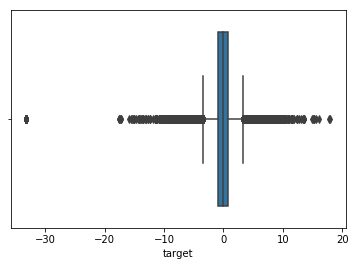

In [7]:
sns.boxplot(x=hist_trans1["target"])
plt.show()

### finding missing values

In [8]:
hist_trans1.isnull().sum()/hist_trans1.shape[0]*100

card_id                                  0.000000
feature_1                                0.000000
feature_2                                0.000000
feature_3                                0.000000
target                                   0.000000
mv0-1                                    0.791781
mv1-2                                    8.528570
mv2-3                                   24.676110
mv3-4                                   41.006925
mv4above                                20.692379
tr0-02                                  16.310501
tr02-05                                  6.643464
tr05-1                                   4.601266
tr1-3                                    4.050089
tr3andabove                             15.141338
trp0-02                                  0.000000
trp02-05                                 0.000000
trp05-1                                  0.000000
trp1-3                                   0.000000
trp3andabove                             0.000000


### Repace Missing Values with 0.

In [9]:
hist_trans1.replace(np.nan, 0, inplace=True)
hist_trans1.isnull().sum()/hist_trans1.shape[0]*100

card_id                                 0.0
feature_1                               0.0
feature_2                               0.0
feature_3                               0.0
target                                  0.0
mv0-1                                   0.0
mv1-2                                   0.0
mv2-3                                   0.0
mv3-4                                   0.0
mv4above                                0.0
tr0-02                                  0.0
tr02-05                                 0.0
tr05-1                                  0.0
tr1-3                                   0.0
tr3andabove                             0.0
trp0-02                                 0.0
trp02-05                                0.0
trp05-1                                 0.0
trp1-3                                  0.0
trp3andabove                            0.0
tru0-02                                 0.0
tru02-05                                0.0
tru05-1                         

In [21]:
hist_trans1.dtypes

card_id                                  object
feature_1                                 int64
feature_2                                 int64
feature_3                                 int64
target                                  float64
mv0-1                                   float64
mv1-2                                   float64
mv2-3                                   float64
mv3-4                                   float64
mv4above                                float64
tr0-02                                  float64
tr02-05                                 float64
tr05-1                                  float64
tr1-3                                   float64
tr3andabove                             float64
trp0-02                                 float64
trp02-05                                float64
trp05-1                                 float64
trp1-3                                  float64
trp3andabove                            float64
tru0-02                                 

In [10]:
import regex as re
hist_trans1['lag_diff_coef'] = hist_trans1['lag_diff_coef'].replace(r'[^\w]', 0, regex = True)
hist_trans1.lag_diff_coef

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
            ...   
221496    1.000000
221497    1.000000
221498    1.000000
221499    1.000000
221500    1.000000
221501    1.357143
221502    1.000000
221503    1.150350
221504    1.000000
221505    1.000000
221506    1.300000
221507    1.083333
221508    1.300000
221509    1.000000
221510    1.000000
221511    1.636364
221512    1.000000
221513    1.262238
221514    1.000000
221515    1.032967
221516    1.190476
221517    1.

In [11]:
hist_trans1['card_id'] = hist_trans1['card_id'].astype('category')
hist_trans1.dtypes

card_id                                 category
feature_1                                  int64
feature_2                                  int64
feature_3                                  int64
target                                   float64
mv0-1                                    float64
mv1-2                                    float64
mv2-3                                    float64
mv3-4                                    float64
mv4above                                 float64
tr0-02                                   float64
tr02-05                                  float64
tr05-1                                   float64
tr1-3                                    float64
tr3andabove                              float64
trp0-02                                  float64
trp02-05                                 float64
trp05-1                                  float64
trp1-3                                   float64
trp3andabove                             float64
tru0-02             

In [13]:
"""object_cols = hist_trans1.select_dtypes(include = ['object'])
other_cols = hist_trans1.select_dtypes(exclude = ['object'])
print(object_cols.shape)
other_cols.shape"""

(221526, 0)


(221526, 117)

In [14]:
#object_cols.columns

Index([], dtype='object')

In [15]:
"""object_cols = object_cols.apply(pd.to_numeric)
print(type(object_cols))
object_cols.dtypes"""

<class 'pandas.core.frame.DataFrame'>


Series([], dtype: object)

In [16]:
#hist_trans_final = pd.concat([object_cols, other_cols], axis = 1)
#hist_trans_final.shape

(221526, 117)

In [17]:
#type(hist_trans_final)

pandas.core.frame.DataFrame

In [12]:
hist_trans_final = hist_trans1.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hist_trans_final['card_id'] = le.fit_transform(hist_trans1.card_id)

In [80]:
hist_trans_final.dtypes
hist_trans_final.head()

,card_id,feature_1,feature_2,feature_3,target,mv0-1,mv1-2,mv2-3,mv3-4,mv4above,...,purchase_coef,purchase_intercept,subsector_id_coef_count,subsector_id_coef_inter,subsector_id_coef_new,subsector_id_intercept_count,subsector_id_intercept_inter,subsector_id_intercept_new,trans_count_coef,trans_count_intercept
0,115545,5,2,1,-0.820283,81.0,19.0,7.0,1.0,12.0,...,-23.809091,-5.690909,9.245455,3.854545,1.830303,-13.200000,-0.200000,4.533333,28.109091,-2.109091
1,48216,4,1,0,0.392913,98.0,28.0,9.0,1.0,16.0,...,-22.246429,28.571429,9.867857,3.690110,0.703297,-2.676190,4.395604,8.868132,26.171429,-21.371429
2,168668,2,2,0,0.688056,11.0,1.0,1.0,0.0,1.0,...,-2.264706,-11.750000,1.038235,0.525000,0.203571,4.925000,-0.933333,0.171429,2.335294,11.400000
3,19257,4,3,0,0.142495,46.0,11.0,0.0,0.0,2.0,...,-8.154762,-15.178571,5.190476,2.642857,0.964286,0.142857,2.142857,4.285714,9.357143,15.142857
4,161983,1,3,0,-0.159749,83.0,14.0,1.0,1.0,3.0,...,-18.914286,-9.133333,7.600000,3.700000,1.800000,-0.266667,0.900000,2.600000,30.457143,-2.933333


In [14]:
X = hist_trans1.copy().drop('target', axis = 1)
Y = hist_trans1['target']

param = {'boosting_type': 'gbdt',
          'max_depth' : -1}

grid_param = {'num_leaves': [np.arange(30,80, 1)],
         'min_data_in_leaf': [np.arange(10,45, 1)], 
         'objective':['regression'],
         'max_depth': [np.arange(1,20, 1)],
         'learning_rate': [0.011, 0.015, 0.019, 0.025],
         "boosting": ["gbdt",'rf','dart', 'goss'],
         "feature_fraction": [0.5,0.6,0.7,0.8,0.9],
         "bagging_freq": [np.arange(1, 10, 1)],
         "bagging_fraction": [0.6,0.7,0.8,0.9],
         "bagging_seed": [11],
         "metric": ['rmse','mae','mse'],
         "lambda_l1": [0.03,0.05,0.07,0.08,0.09],
         "lambda_l2": [0.03,0.05,0.07,0.08,0.09],
         "verbosity": [-1],
         "nthread": [4],
         "random_state": [1]}

trainX, valX, trainY, valY = train_test_split(X,Y, test_size = 0.2, random_state = 1, shuffle = True)
#trainY = trainY.ravel()

d_train = lgb.Dataset(trainX, label = trainY, categorical_feature = ['card_id'])

In [16]:
X = hist_trans_final.copy().drop('target', axis = 1)
Y = hist_trans_final['target']


grid_param = {'num_leaves': [30,40,60, 80],
              'boosting_type': ['gbdt'],
         'min_data_in_leaf': [10, 15, 20], 
         'objective':['regression'],
         'max_depth': [15, 20, 25],
         'learning_rate': [0.011, 0.015, 0.025],
         "verbosity": [-1],
         "nthread": [4]}

trainX, valX, trainY, valY = train_test_split(X,Y, test_size = 0.2, random_state = 1, shuffle = True)
#trainY = trainY.ravel()

d_train = lgb.Dataset(trainX, label = trainY, categorical_feature = ['card_id'])

### training and prediction

In [17]:
lightGBM = LGBMRegressor(n_estimators=100)
grid_cv = GridSearchCV(lightGBM, param_grid=grid_param, cv=10, n_jobs = -1)
grid_cv.fit(trainX, trainY)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: 

In [32]:
lightGBM = lgb.train(param, d_train, 100)
y_pred = lightGBM.predict(valX)

C:\Users\HP\Anaconda3\lib\site-packages\lightgbm\basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [33]:
rmse = sqrt(mean_squared_error(valY, y_pred))
print(rmse)
r_squared = r2_score(valY, y_pred)
print(r_squared)

3.8924295481627302
0.011795718520287934


In [ ]:
rmse = 3.8924295481627302
r_square = 0.011795718520287934

In [134]:
values = lightGBM.feature_importance()

In [135]:
values

array([  0,  20,  19,  10,  70,   2,   6,   3,  15,  19,  20,  43,  18,
        25,  36,  64,  59,  16,  41, 224,   0,   1,   1,   5,  16,   0,
         3,  11,  14,  37,   0,   0,   1,   5,  18,   1,   5,  13,  11,
        27,   0,   0,   1,   0,   6,   0,  14,   1,   3,  25,  21,  27,
        43,  85,  32,  29,  21,   5,   7,   3,   6,  25,  17,  11,   7,
         6,   1,  15,  23,   3,  16,  19,  53,  24,  39,  34,  37,   8,
        13,  13,   4,  12, 120,  68,  95,  86,  39,  31,  31,  31,  47,
        62,   5, 162,   6,  19,  35,  10,  44,  27,  13,  42,  25,  15,
        24,  52,  38,  43,  10,  35,  51,  22,  43,  24,  26,  31])

In [128]:
col_names = trainX.columns

In [152]:
feature_imp = pd.DataFrame({'columns':col_names, 'imp_features':values})
feature_imp.sort_values(by='imp_features', ascending=False)

,columns,imp_features
19,tru0-02,224
93,lag_diff_intercept,162
82,cat1_trend_coef,120
84,cat2_trend_coef,95
85,cat2_trend_intercept,86
53,Y,85
4,mv0-1,70
83,cat1_trend_intercept,68
15,trp02-05,64
91,installments_trend_intercept,62


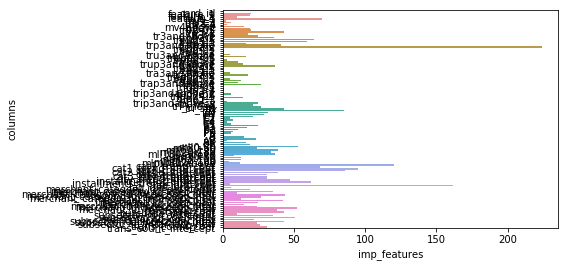

In [150]:
sns.barplot(x='imp_features', y = 'columns',data = feature_imp)